Support Vector Regression (SVR)

Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing The Dataset

In [2]:
dataset = pd.read_csv('D:\Machine Learning\Regression\Support Vector Regression\Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training The SVR Model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor =SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting A New Result

In [12]:
print(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)))

[[170370.0204065]]


Visualising The SVR Result

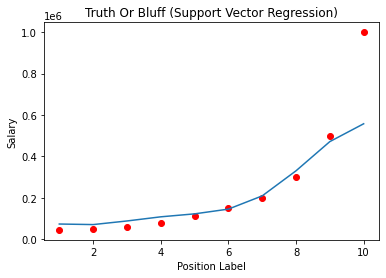

In [13]:
plt.scatter(sc_X.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)))
plt.title('Truth Or Bluff (Support Vector Regression)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

Visualising The SVR Results (for Higher Resolution and Smoother Curve)

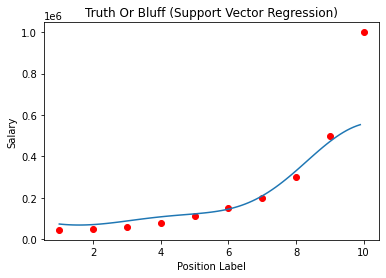

In [18]:
x_grid = np.arange(min(sc_X.inverse_transform(x)),max(sc_X.inverse_transform(x)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_X.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(x_grid)).reshape(-1,1)))
plt.title('Truth Or Bluff (Support Vector Regression)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()